<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<h1>Лабораторная работа 2, №2371, Малашонок Никита Алексеевич</h1> 

<p><h2>1.</h2> <a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data">https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data</a> - выбранный датасет.</p>

<p><h2>2.</h2></p>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('winequality-red.csv') # записываем данные в датафрейм

print(df.head()) # выведем первые строки датасета, чтобы убедиться, что все хорошо

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:

# Сведем классификацию к бинарной - вина, которые имеют качество выше 6.5 - хорошие (1), иначе - плохое (0).


df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)   



X = df.drop(columns = ['quality', 'quality_binary'])
y = df['quality_binary']

# Разделим данные на тестовые и тренировочные.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [ ]:

#Посмотрим на сбалансированность полученных классов. Получается сильная разница.

df['quality_binary'].value_counts()

quality_binary
0    1382
1     217
Name: count, dtype: int64

In [ ]:
# Применим метод увеличения числа случаев в наборе данных, чтобы поправить сбалансированность - SMOTE.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [ ]:
# Обучим модель knn и decision tree для дальнейшего сравнения.

knn = KNeighborsClassifier(n_neighbors=2)
dec_tree = DecisionTreeClassifier(random_state=42)

knn.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn.predict(X_test)

dec_tree.fit(X_train_smote, y_train_smote)
y_pred_tree_smote = dec_tree.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred_knn_smote))
print(classification_report(y_test, y_pred_tree_smote))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       277
           1       0.60      0.67      0.64        43

    accuracy                           0.90       320
   macro avg       0.78      0.80      0.79       320
weighted avg       0.90      0.90      0.90       320

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       277
           1       0.51      0.72      0.60        43

    accuracy                           0.87       320
   macro avg       0.73      0.81      0.76       320
weighted avg       0.89      0.87      0.88       320



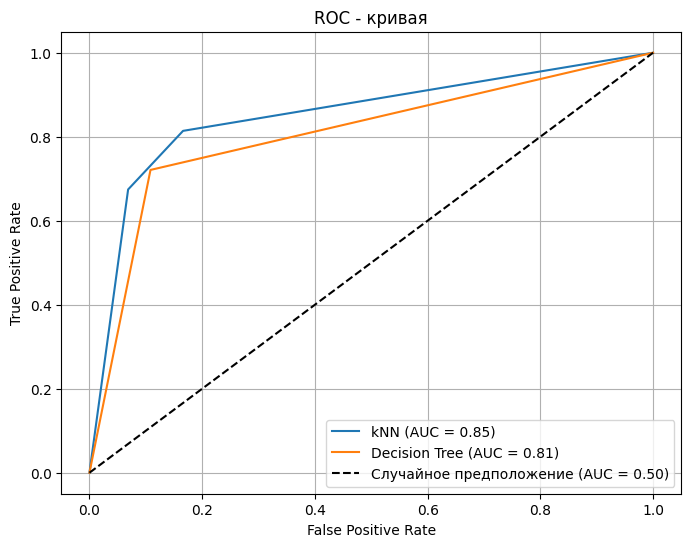

In [56]:
# Построим ROC-кривую.
from sklearn.metrics import roc_curve, auc

y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_tree = dec_tree.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"kNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Случайное предположение (AUC = 0.50)")
plt.title("ROC - кривая")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

<style>
    *{
        font-size: 14px;
    }

    h1{
        font-size: 24px;
        text-align: center;
        font-weight: bold;
    }

    h2{
        font-size: 16px;
        display: inline-block;
        
    }


    span{
        font-style: oblique;
    }
    
    a{
        text-decoration: underline;
    }
</style>

<p><h2>3.</h2></p>

Вывод:

1. Класс "плохое вино" (0):

| Модель        | Precision | Recall | F-score |
|---------------|-----------|--------|---------|
| kNN           | 0,95      | 0,93   | 0,94    |
| Decision Tree | 0,95      | 0,89   | 0,92    |

Метрика Precision в данном случае одинакова у обеих моделей, однако исходя из Recall, можно сказать, что kNN немного лучше распознает плохое вино. Значения F-score указывают на то, что kNN имеет более сбалансированное поведение.

2. Класс "хорошее вино" (1):

| Модель        | Precision | Recall | F-score |
|---------------|-----------|--------|---------|
| kNN           | 0,60      | 0,67   | 0,64    |
| Decision Tree | 0,51      | 0,72   | 0,60    |

Обе модели достаточно плохо предсказывают хорошие вина. Здесь также модель kNN немного превосходит Decision Tree, кроме параметра Recall - дерево решений распознает реальное хорошее вино лучше.

3. Общий показатель

Метод kNN показывает более высокую точность, нежели дерево решений (Accuracy: 0,90 против 0,87).

4. ROC
Исходя из ROC - кривой, метод kNN имеет б*о*льшую площадь под графиком, что указывает на лучшее разделение классов, нежели при использовании дерева решений.

Таким образом, kNN лучше подошел для выбранного датасета, обеспечив более высокую точность и общее качество. Однако, если важно минимизировать пропуски класса "хорошего" вина (важен Recall для хорошего вина), то Decision Tree показывает более лучший результат.